<a href="https://colab.research.google.com/github/TanTruong24/Kaggle-competitions/blob/main/titanic/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 1dmwhC5kRjwG4Sz8oGQdzSxMMG-CDAiAQ
!unzip data_titanic.zip

Downloading...
From: https://drive.google.com/uc?id=1dmwhC5kRjwG4Sz8oGQdzSxMMG-CDAiAQ
To: /content/data_titanic.zip
100% 34.3k/34.3k [00:00<00:00, 13.2MB/s]
Archive:  data_titanic.zip
  inflating: detail.csv              
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


#libs

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import seaborn as sns

#training set

**survival**: chứa các dự đoán nhị phân của bạn: 1 cho người sống sót, 0 cho người đã chết

In [ ]:
detail = pd.read_csv("/content/detail.csv")
detail

,Unnamed: 0,variable,definition,key
0,0,survival,survival,"0 = No, 1 = Yes"
1,1,pclass,pclass,"1 = 1st, 2 = 2nd, 3 = 3rd"
2,2,sex,sex,NaN
3,3,Age,Age in years,
4,4,sibsp,# of siblings / spouses aboard the Titanic,
5,5,parch,# of parents / children aboard the Titanic,
6,6,ticket,Ticket number,
7,7,fare,Passenger fare,
8,8,cabin,Cabin number,
9,9,embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


In [ ]:
d_train = pd.read_csv("/content/train.csv")
print (len(d_train))
d_train.head()

891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##preprocessing data

In [ ]:
d_train.replace('?', np.nan, inplace= True)
d_train = d_train.astype({"Age": np.float64, "Fare": np.float64})

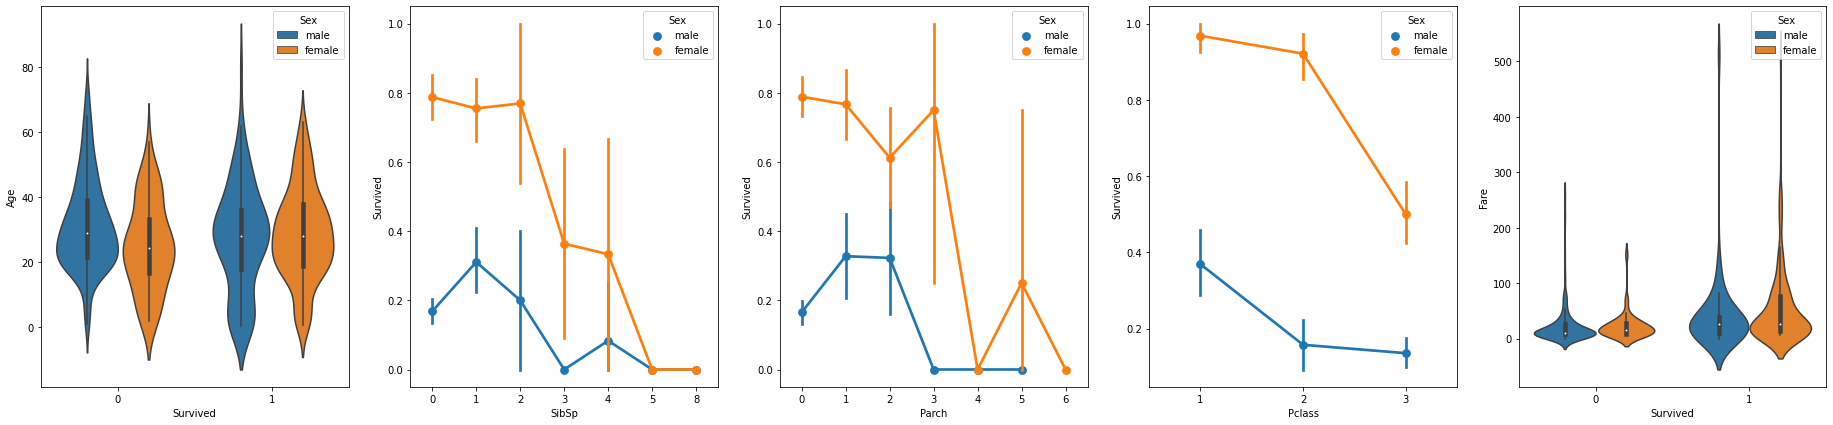

In [ ]:
fig, axs = plt.subplots(ncols=5, figsize=(32,7))
sns.violinplot(x="Survived", y="Age", hue="Sex", data=d_train, ax=axs[0])
sns.pointplot(x="SibSp", y="Survived", hue="Sex", data=d_train, ax=axs[1])
sns.pointplot(x="Parch", y="Survived", hue="Sex", data=d_train, ax=axs[2])
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=d_train, ax=axs[3])
sns.violinplot(x="Survived", y="Fare", hue="Sex", data=d_train, ax=axs[4])

In [ ]:
d_train.replace({'male': 1, 'female': 0}, inplace=True)
d_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
d_train.corr().abs()[["Survived"]]

,Survived
PassengerId,0.005007
Survived,1.000000
Pclass,0.338481
Sex,0.543351
Age,0.077221
SibSp,0.035322
Parch,0.081629
Fare,0.257307


In [ ]:
d_train['Relatives'] = d_train.apply (lambda row: int((row['SibSp'] + row['Parch']) > 0), axis=1)
d_train.corr().abs()[["Survived"]]

,Survived
PassengerId,0.005007
Survived,1.000000
Pclass,0.338481
Sex,0.543351
Age,0.077221
SibSp,0.035322
Parch,0.081629
Fare,0.257307
Relatives,0.203367


In [ ]:
d_train['Age'].fillna(value=d_train['Age'].mean(), inplace=True)

In [ ]:
d_train = d_train[['Sex', 'Pclass','Age','Relatives','Fare','Survived']]
d_train

,Sex,Pclass,Age,Relatives,Fare,Survived
0,1,3,22.000000,1,7.2500,0
1,0,1,38.000000,1,71.2833,1
2,0,3,26.000000,0,7.9250,1
3,0,1,35.000000,1,53.1000,1
4,1,3,35.000000,0,8.0500,0
...,...,...,...,...,...,...
886,1,2,27.000000,0,13.0000,0
887,0,1,19.000000,0,30.0000,1
888,0,3,29.699118,1,23.4500,0
889,1,1,26.000000,0,30.0000,1


#start train

##split data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(d_train[['Sex', 'Pclass','Age','Relatives','Fare']], d_train.Survived, test_size=0.2, random_state=0)

##train

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

##metric validation set

In [ ]:
predict_val = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_val))

0.7821229050279329


In [ ]:
predict_val

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

#predict test

In [ ]:
df_test = pd.read_csv("/content/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_test.replace('?', np.nan, inplace= True)
df_test = df_test.astype({"Age": np.float64, "Fare": np.float64})

In [ ]:
df_test.replace({'male': 1, 'female': 0}, inplace=True)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df_test['Relatives'] = df_test.apply (lambda row: int((row['SibSp'] + row['Parch']) > 0), axis=1)

In [ ]:
print (df_test['Age'].isnull().sum())
print (df_test['Fare'].isnull().sum())

86
1


In [ ]:
df_test['Age'].fillna(value=df_test['Age'].mean(), inplace=True)
df_test['Fare'].fillna(value=df_test['Fare'].mean(), inplace=True)

In [ ]:
df_test = df_test[['PassengerId', 'Sex', 'Pclass','Age','Relatives','Fare']]
df_test

,PassengerId,Sex,Pclass,Age,Relatives,Fare
0,892,1,3,34.50000,0,7.8292
1,893,0,3,47.00000,1,7.0000
2,894,1,2,62.00000,0,9.6875
3,895,1,3,27.00000,0,8.6625
4,896,0,3,22.00000,1,12.2875
...,...,...,...,...,...,...
413,1305,1,3,30.27259,0,8.0500
414,1306,0,1,39.00000,0,108.9000
415,1307,1,3,38.50000,0,7.2500
416,1308,1,3,30.27259,0,8.0500


In [ ]:
st = StandardScaler()
test = st.fit_transform(df_test[['Sex', 'Pclass','Age','Relatives','Fare']])

In [ ]:
predict_test = model.predict(test)
print(len(predict_test))

418


In [ ]:
gender_submission = pd.DataFrame({'PassengerId': df_test['PassengerId'],
                                  'Survived': predict_test})

gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


##save csv

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
gender_submission.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Kaggle Competitions/Titanic-ML-from-Disaster/gender_submission.csv', index=False)
gender_submission.to_csv('/content/gender_submission.csv', index=False)

#Use NN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import callbacks
from tensorflow import keras
from keras.models import load_model


In [ ]:
keras.backend.clear_session()

In [ ]:
model_nn = Sequential()

model_nn.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model_nn.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model_nn.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(d_train[['Sex', 'Pclass','Age','Relatives','Fare']], d_train.Survived, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [ ]:
model_nn.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
#model_nn.fit(X_train, y_train, batch_size=32, epochs=50)

In [ ]:
mc = callbacks.ModelCheckpoint('model_nn.h5',
                                monitor='val_accuracy', 
                                mode='max', verbose=1, 
                                save_best_only=True)
es = callbacks.EarlyStopping(monitor ="val_loss", 
                                    mode ="min", verbose=1,  patience = 5, 
                                    restore_best_weights = True)

# huấn luyện fc
print("[INFO] training head...")
H = model_nn.fit(
            X_train, y_train, batch_size=32,
            validation_data=(X_test, y_test),
            epochs=500, callbacks = [es, mc])

[INFO] training head...
Epoch 1/500
23/23 [==============================] - 1s 17ms/step - loss: 0.6925 - accuracy: 0.5763 - val_loss: 0.6907 - val_accuracy: 0.6145

Epoch 00001: val_accuracy improved from -inf to 0.61453, saving model to model_nn.h5
Epoch 2/500
23/23 [==============================] - 0s 4ms/step - loss: 0.6902 - accuracy: 0.6109 - val_loss: 0.6880 - val_accuracy: 0.6145

Epoch 00002: val_accuracy did not improve from 0.61453
Epoch 3/500
23/23 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.6241 - val_loss: 0.6834 - val_accuracy: 0.6145

Epoch 00003: val_accuracy did not improve from 0.61453
Epoch 4/500
23/23 [==============================] - 0s 5ms/step - loss: 0.6833 - accuracy: 0.5996 - val_loss: 0.6755 - val_accuracy: 0.6145

Epoch 00004: val_accuracy did not improve from 0.61453
Epoch 5/500
23/23 [==============================] - 0s 4ms/step - loss: 0.6750 - accuracy: 0.6046 - val_loss: 0.6626 - val_accuracy: 0.6145

Epoch 00005: va

In [ ]:
print ("score validation set:")
validation_loss, validation_acc = model_nn.evaluate(X_test,  y_test)
print ("score training set:")
train_loss, train_acc = model_nn.evaluate(X_train,  y_train)

score validation set:
6/6 [==============================] - 0s 3ms/step - loss: 0.4058 - accuracy: 0.7933
score training set:
23/23 [==============================] - 0s 3ms/step - loss: 0.4396 - accuracy: 0.7865


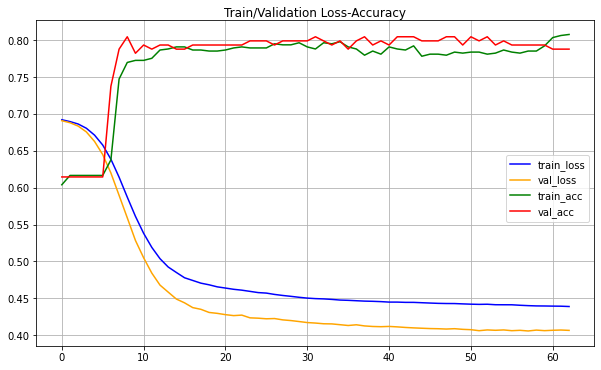

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(H.history["loss"], 'blue', label="train_loss")
plt.plot(H.history["val_loss"], 'orange',label="val_loss")
plt.plot(H.history["accuracy"], 'green', label="train_acc")
plt.plot(H.history["val_accuracy"], 'red',label="val_acc")
plt.title('Train/Validation Loss-Accuracy', pad=-50)
plt.legend(bbox_to_anchor = (1, 0.6))
plt.grid(True)
plt.show()

In [ ]:
model_nn = load_model("/content/model_nn.h5")

y_pred_test = model_nn.predict_classes(test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
test_pred = []
for i in y_pred_test:
  test_pred.append(i[0])

print (len(test_pred))

418


In [ ]:

gender_submission_nn = pd.DataFrame({'PassengerId': df_test['PassengerId'],
                                  'Survived': test_pred})

gender_submission_nn

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
gender_submission_nn.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Kaggle Competitions/Titanic-ML-from-Disaster/gender_submission_nn.csv', index=False)
gender_submission_nn.to_csv('/content/gender_submission_nn.csv', index=False)